### QED-C Application-Oriented Benchmarks - Qiskit - Image Recognition

The notebook contains specific examples for the Image Recognition benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

In [1]:
# This is a temporary cell for devwork so I don't have to restart the kernel every time I make a change.
%load_ext autoreload
%autoreload 2


In [16]:
min_qubits=4
max_qubits=6
max_circuits=1
num_shots=1000

#backend_id="qasm_simulator"
backend_id="statevector_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples create a provider instance and get a backend from it

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider
# import sys
# sys.path.insert(1, "../..")
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":'cpu' }

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"


In [17]:
# Custom optimization options can be specified in this cell (below is an example)

import sys
sys.path.insert(1, "../../")

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### Image Recognition - Method 1 - Fidelity of Ansatz

This benchmark is similar to benchmarks at the top-level in that it executes a quantum circuit to measure its fidelity of execution on a specific backend system.
Here, the circuit tested is ansatz used in the image recognition benchmark.

Image Recognition Benchmark Program - Qiskit
... execution starting at Apr 24, 2024 18:50:05 UTC
************
Executing [1] circuit for num_qubits = 4
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 36, 0.156
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 28, 0.2, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.019, 0.046, 0.003 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 1.0, 1.0

************
Executing [1] circuit for num_qubits = 6
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 58, 0.159
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 44, 0.211, 24.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.036, 0.05, 0.002 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Avera

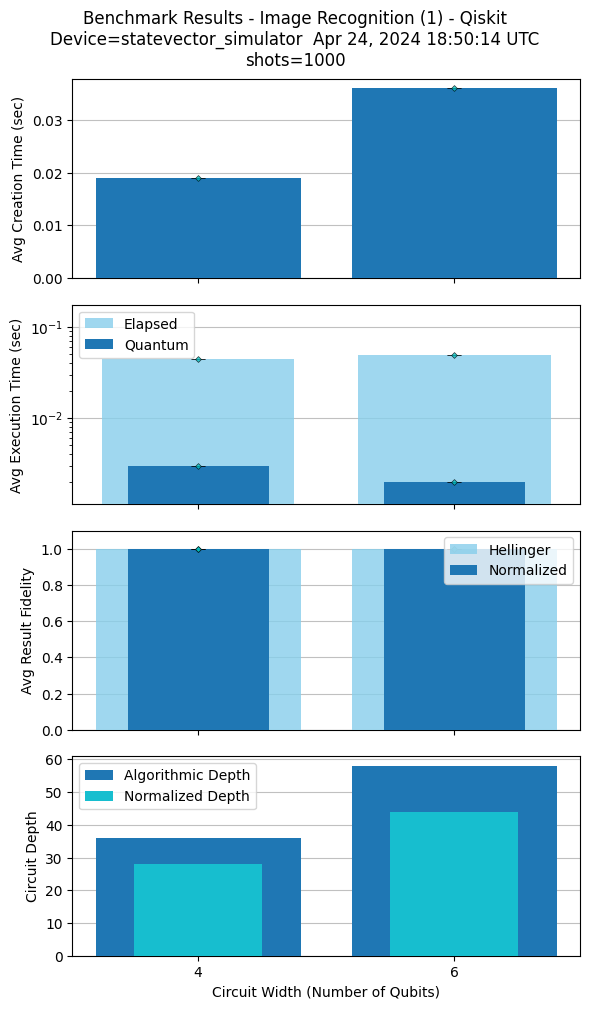

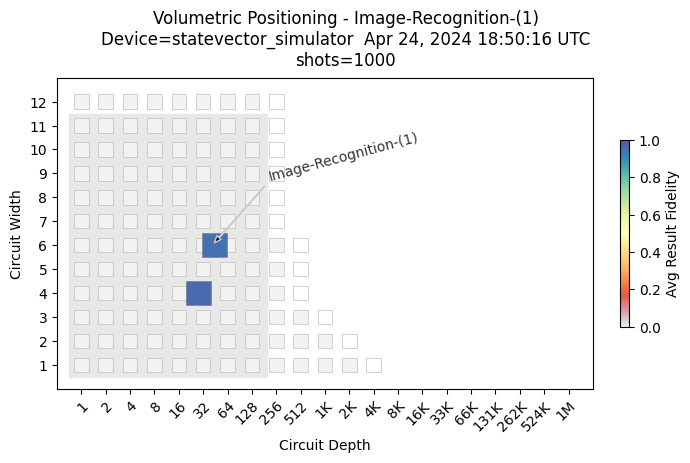

In [20]:
import sys
sys.path.insert(1, "image-recognition/qiskit")
import image_recognition_benchmark

# Arguments applicable to Image Recognition benchmark method (1)
hl_app_args = dict(
    
    thetas_array=None,          # specify a custom thetas_array
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
)

# Run the benchmark in method 1
image_recognition_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)


### Image Recognition - Method 2 - Training the Algorithm

This method executes the benchmark as a Variational Quantum Eigensolver (VQE) that uses the ansatz tested in method (1).
This method trains the algorithm to find the set of angles that best fits the image recognition function. These angles are stored in a data file for use in method 3, the test method.


Image Recognition Benchmark Program - Qiskit
... execution starting at Apr 24, 2024 18:51:18 UTC
************
Executing [qcnn uniform] circuit for num_qubits = 4
..
.
..................................................................................................!
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 36, 0.156
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 28, 0.2, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 1.931, 2.395, 0.177 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0, 0

************
Executing [qcnn uniform] circuit for num_qubits = 6
..
.
..................................................................................................!
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 58, 0.159
Average Normalized Transpiled Depth, ξ (xi), 2q

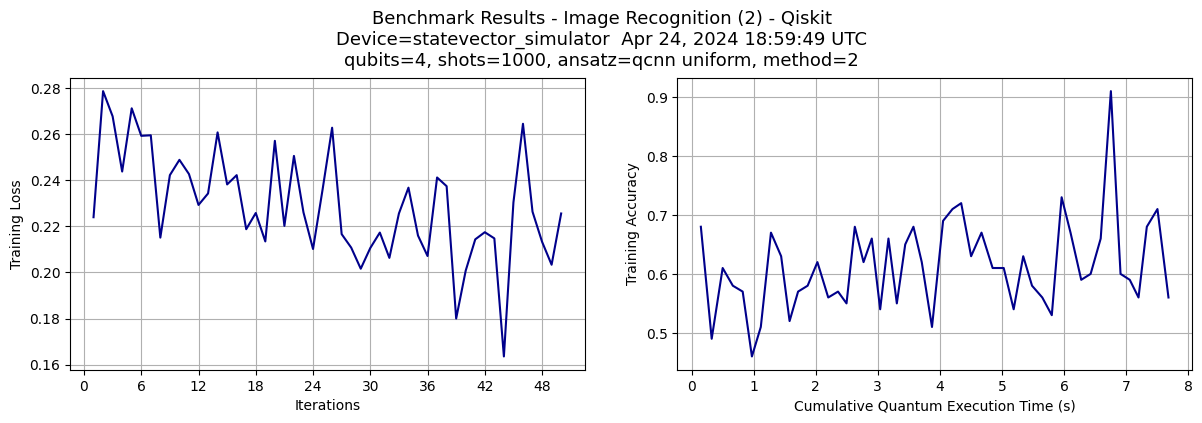

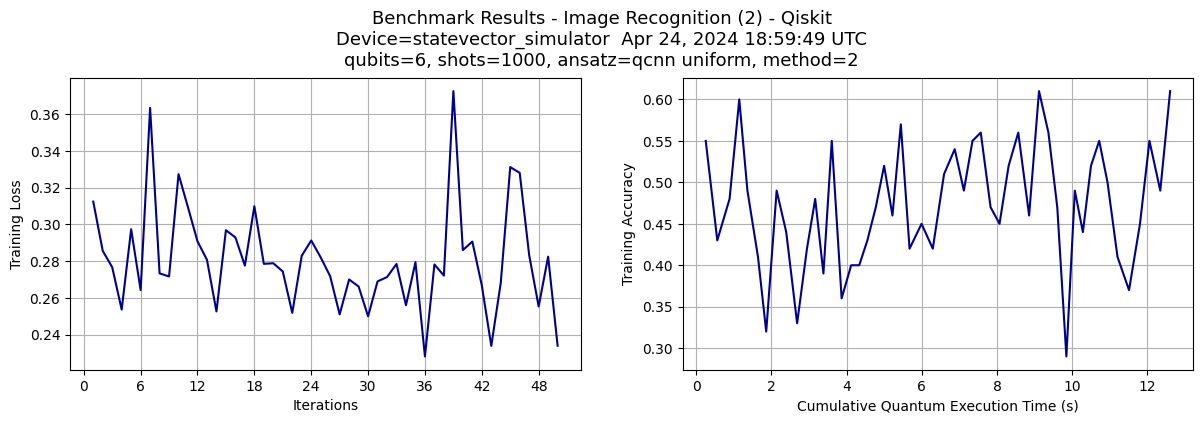

----- Cumulative Plots for all qubit groups -----


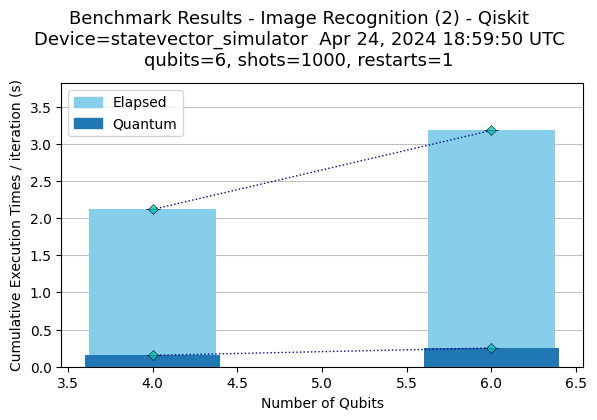

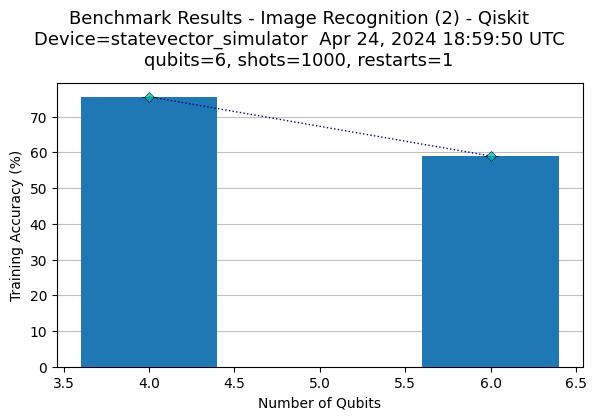

In [21]:
import sys
sys.path.insert(1, "image-recognition/qiskit")
import image_recognition_benchmark

# Arguments specific to Image Recognition benchmark method (2)
hl_app_args = dict(
  
    thetas_array=None,          # specify a custom thetas_array
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
       
    train_size=200,
    test_size=50,
    batch_size=50,              # size of image batch
    test_pass_count=30,         # number of test passes
    
    max_iter=50,                # maximum minimizer iterations to perform  
    comfort=True,               # show 'comfort dots' during execution
)

image_recognition_benchmark.verbose=False

# Run the benchmark in method 2
image_recognition_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)


### Image Recognition - Method 3 - Testing Against Unknown Images

This method executes the algorithm against a set of unknown test images, using the parameters identified during the training pass in method 2.
The figure of merit is the accuracy by which the algorithm is able to recognize the images.


Image Recognition Benchmark Program - Qiskit
... execution starting at Apr 24, 2024 18:59:51 UTC
************
Executing [qcnn uniform] circuit for num_qubits = 4
.........................!
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 36, 0.156
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 28, 0.2, 12.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 1.559, 24.751, 1.82 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0, 0

************
Executing [qcnn uniform] circuit for num_qubits = 6
.........................!
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 58, 0.159
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 44, 0.211, 24.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 2.561, 29.699, 2.666 secs
Average Transpili

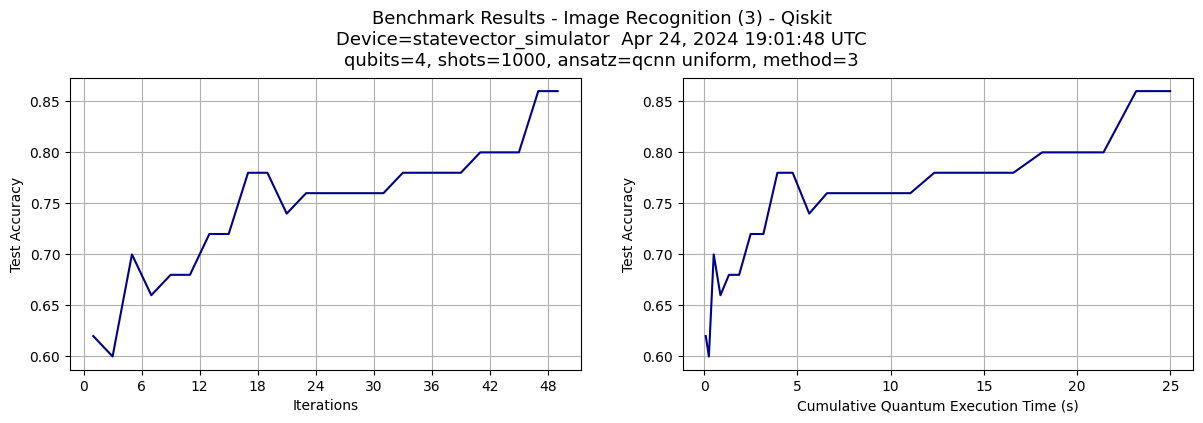

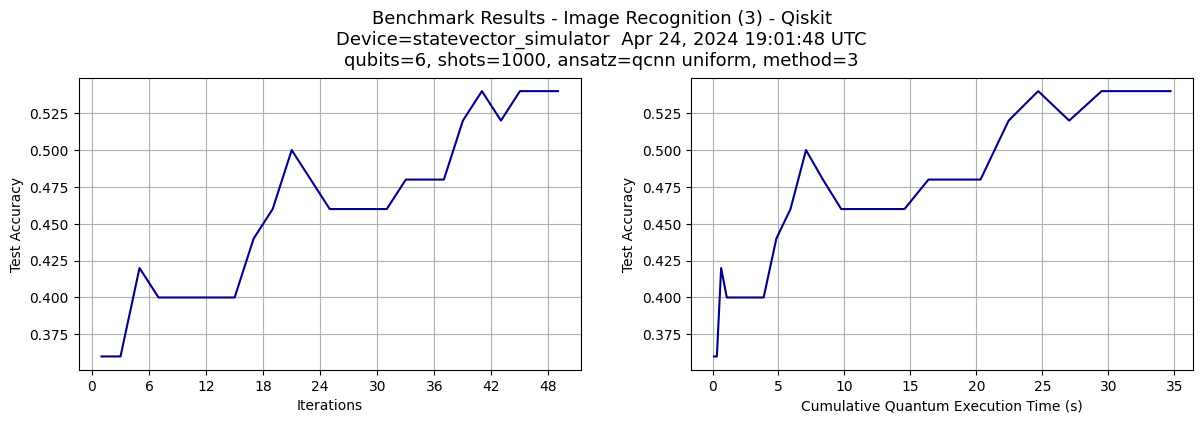

----- Cumulative Plots for all qubit groups -----


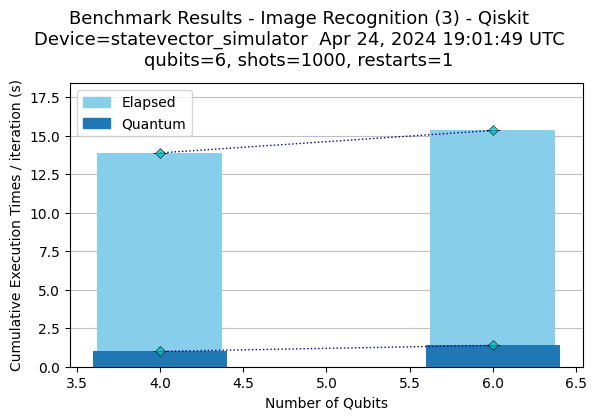

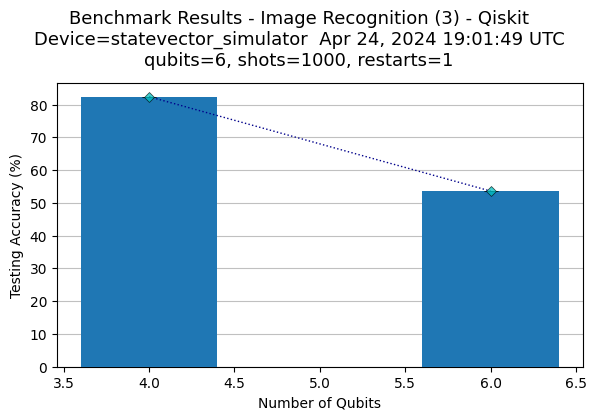

In [22]:
import sys
sys.path.insert(1, "image-recognition/qiskit")
import image_recognition_benchmark

# Arguments specific to Image Recognition benchmark method (2)
hl_app_args = dict(
  
    thetas_array=None,          # specify a custom thetas_array
    parameterized=False,        # use Parameter objects in circuit, cache transpiled circuits for performance
    
    train_size=200,
    test_size=50,
    batch_size=50,              # size of image batch
    test_pass_count=30,         # number of test passes
    
    comfort=True,               # show 'comfort dots' during execution
)

image_recognition_benchmark.verbose=False

# Run the benchmark in method 3
image_recognition_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=3, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    **hl_app_args)
